In [ ]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import sys
import re
from sklearn.svm import SVR

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Hascol_Final_data_with_infScoreV1.csv to Hascol_Final_data_with_infScoreV1.csv


In [ ]:
ndf = pd.read_csv('Hascol_Final_data_with_infScoreV1.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
ndf

,Unnamed: 0,Open,High,Low,Close,Volume,Sen_score,Sen_label,Infleunce,T_id,TWITTER HANDLE,s_score_mean,s_sentiment_label,Infs_add,Infs_mean,next_day_close_price,next_day_open_price
Date,,,,,,,,,,,,,,,,,
2016-12-31,365,338.25,349.195,336.880,345.955,1359150,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,345.955,338.25
2017-01-01,366,338.25,349.195,336.880,345.955,1359150,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,354.390,339.50
2017-02-01,367,339.50,354.390,337.250,354.390,1694400,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,354.790,358.99
2017-03-01,368,358.99,364.000,352.000,354.790,1710500,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,353.970,353.32
2017-04-01,369,353.32,359.890,353.000,353.970,580300,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,351.040,350.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1456,24.40,24.400,23.500,24.400,5771500,[0.2023],['Pos'],[1274582.498159],['1210430591692353536'],['dawn_com'],0.20230,Pos,1.274582e+06,1.274582e+06,25.010,24.70
2019-12-28,1457,24.70,25.010,24.155,25.010,4427750,[],[],[],[],[],0.00000,NaN,6.503076e+05,0.000000e+00,25.010,24.70
2019-12-29,1458,24.70,25.010,24.155,25.010,4427750,[0.],['Neu'],[26032.629646],['1211154502751010816'],['TheCurrentPK'],0.00000,Neu,2.603263e+04,2.603263e+04,25.620,25.00


In [ ]:
ndf = ndf[["Close", "s_score_mean", "Open", "High", "Low" , "next_day_open_price" ,"Infs_add"	]]
ndf = ndf.dropna()
ndf.shape

(1095, 7)

In [ ]:
X = ndf[["Close", "s_score_mean", "Open" ,"Infs_add"	]]
Y = ndf['next_day_open_price']
yy = np.array(Y).reshape(-1, 1)

In [ ]:
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(yy))




X_train = X[: X_split]
X_test = X[X_split:]
y_train = yy[: y_split]
y_test = yy[y_split:]

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(766, 4) (329, 4) (766, 1) (329, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
  #svr_rbf.fit(numpy_df_train, y_train.values.flatten())
  #output_test_svm = svr_rbf.predict(numpy_df_test)

In [ ]:
svr_rbf.fit(X_train , y_train.flatten())

SVR(C=1000000.0, gamma=0.1)

In [ ]:
output_test_svm = svr_rbf.predict(X_test)

In [ ]:
predicted = output_test_svm

In [ ]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))
print('Mean Squared Error:', mean_squared_error(y_test, predicted))

Root Mean Squared Error: 0.05791735337181518
R-squared : 0.9582002813068851
Mean Squared Error: 0.003354419821595711


In [ ]:
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = ndf.index[-len(real_prices): ]) 
stocks.head(50)

,Real,Predicted
Date,,
2019-05-02,169.990,175.398690
2019-06-02,163.500,169.224183
2019-07-02,165.990,178.519176
2019-08-02,164.470,167.218420
2019-09-02,164.470,163.669108
2019-10-02,162.950,164.019951
2019-11-02,158.840,159.844259
2019-12-02,158.780,165.930296
2019-02-13,158.890,168.250744


Text(0.5, 1.0, 'SVR Hascol Stock Prediction')

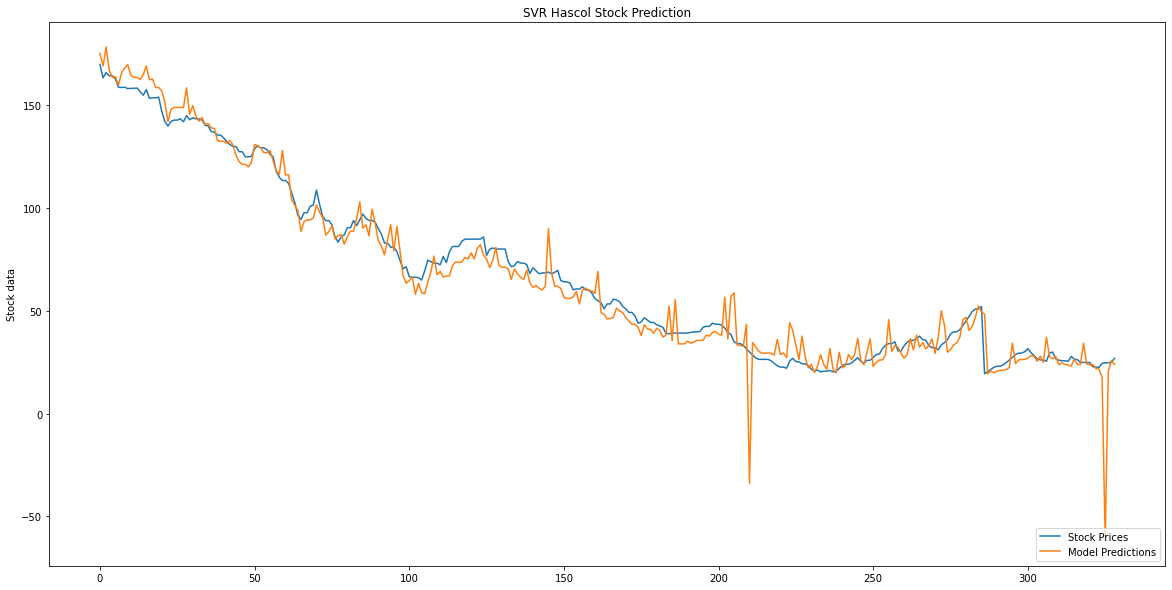

In [ ]:
plt.figure(figsize=(20,10))
range_future = len(predicted)
plt.plot( np.array(stocks['Real']),label='Test data')
plt.plot( np.array(stocks['Predicted']),label='Prediction')
plt.legend(['Stock Prices', 'Model Predictions'], loc='lower right')
plt.ylabel('Stock data')
plt.title('SVR Hascol Stock Prediction')